In [27]:
import numpy as np
import tensorflow as tf
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from misc import Prob, Basics
import matplotlib.pyplot as plt
basics = Basics(dolinar_layers=2)
ats = basics.ats

In [11]:
def pn1(n,beta,alpha=0.4):
    p=0
    for pm in [-1,1]:
        p+=Prob(pm*alpha, beta,n)
    return p

In [12]:
def Q2(b1,n1,b2,alpha=0.4):
    p=0
    for n2 in [0,1]:
        p+=max([Prob(pm*alpha*np.cos(ats[0]), b1,n1)*Prob(pm*alpha*np.sin(ats[0]), b2,n2) for pm in [-1.,1.]])
    p/=pn1(n1,b1)
    return p

In [15]:
def Q1(b1,alpha=0.4):
    p=0
    for n1 in [0,1]:
        p+= max([Q2(b1,n1,b2,alpha) for b2 in np.arange(-1,1,.05)])*pn1(n1,b1)
    return p/2

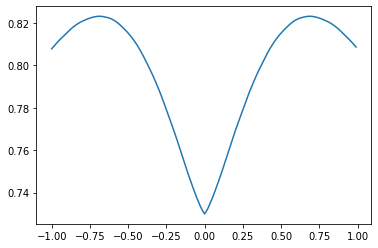

In [16]:
betas = np.arange(-1,1,.01)
plt.plot(betas,[Q1(b) for b in betas])

Now construct the dataset

this is 

{
(\beta1 ------> Q*(\beta1), 
(\beta2 n1 ---> Q*(\beta1 n1, \beta2)
}

And the idea is that the network
predicts this, minimizing the loss:

\sum_s (\hat{Q}(\beta1 n1, \beta2)} - Q*(\beta1 n1, \beta2))**2
\sum_s


### What we'll do first is a basic memoryless setting, where we feed \beta1, n1 \beta2 and it should learn Q()

In [45]:
from nets import Critic

In [55]:
net = Critic()

In [121]:
data =[]
labels=[]
for k in range(1024):
    b1,n1,b2 = [np.random.choice(betas,1)[0],np.random.choice(betas,1)[0], np.random.choice([0,1],1)[0]]
    label = Q2(b1,n1,b2)
    data.append([b1,n1,b2])
    labels.append(label)
labels=np.array(labels).astype(np.float32)

data = np.reshape(data, (len(data),1,3)).astype(np.float32)
labels = np.reshape(labels, (len(labels),1,1))

In [122]:
preds = net(tf.convert_to_tensor(data))
labs=tf.convert_to_tensor(labels)
tf.keras.losses.MSE(labels, preds) - tf.squeeze((preds - labels)**2, axis=-1)

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [167]:
def learn_step():
    with tf.GradientTape() as tape:
        tape.watch(net.trainable_variables)
        preds = net(tf.convert_to_tensor(data))
        loss = tf.reduce_mean(tf.keras.losses.MSE(labels, preds))
        grads = tape.gradient(loss, net.trainable_variables)
    optimizer.apply_gradients(zip(grads, net.trainable_variables))
    return loss

In [163]:
from tqdm import tqdm

In [164]:
l=[]
for k in tqdm(range(10**3)):
    l.append(learn_step())

100%|██████████| 1000/1000 [00:14<00:00, 70.34it/s]


In [168]:
l=[]
for k in tqdm(range(10**3)):
    l.append(learn_step1())

100%|██████████| 1000/1000 [00:03<00:00, 276.33it/s]


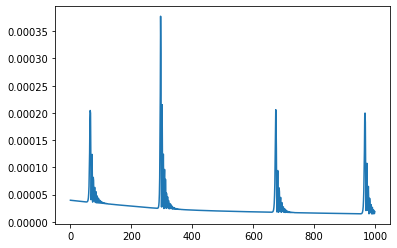

In [169]:
plt.plot(l)

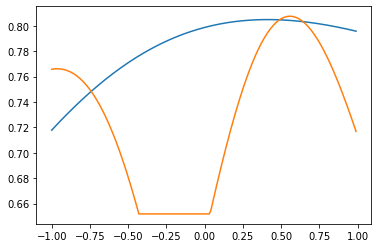

In [170]:
data_test = []
for b in betas:
    data_test.append([b1,0,b])
data_test=np.reshape(data_test, (len(data_test), 1,3))
plt.plot(betas, np.squeeze(net(data_test)))
plt.plot(betas, [Q2(b1,0,b) for b in betas])

In [103]:
for b in betas:
    true.append(np.squeeze(net(np.array([[[b1,b2,0]]]).astype(np.float32))))

array([0.63755256, 0.7563085 , 0.7487032 , 0.64440465, 0.66426337,
       0.66419584, 0.75022596, 0.7626653 , 0.6400792 , 0.7369872 ,
       0.64537907, 0.6444596 , 0.6689466 , 0.7338927 , 0.73433316,
       0.7366533 , 0.7298264 , 0.72976583, 0.7670042 , 0.73352045,
       0.658317  , 0.7380792 , 0.6487367 , 0.75116646, 0.73515636,
       0.6985456 , 0.6590821 , 0.7419349 , 0.75446284, 0.7518584 ,
       0.6663863 , 0.7581924 , 0.6328478 , 0.74455565, 0.73279005,
       0.6622319 , 0.7560608 , 0.7287646 , 0.6457752 , 0.73108643,
       0.72805583, 0.6727277 , 0.6717948 , 0.6552647 , 0.74960035,
       0.74121314, 0.63724965, 0.6452148 , 0.69784963, 0.64684534,
       0.73307955, 0.7371629 , 0.7325464 , 0.7333507 , 0.7454027 ,
       0.6722361 , 0.746878  , 0.7378281 , 0.7441467 , 0.7522502 ,
       0.68227196, 0.6567475 , 0.64117193, 0.7408708 , 0.6762408 ,
       0.6504386 , 0.65151346, 0.64170694, 0.6374298 , 0.6424061 ,
       0.6847693 , 0.72907645, 0.74732715, 0.7305258 , 0.69585